In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mc_geometry import *
np.random.seed(42)

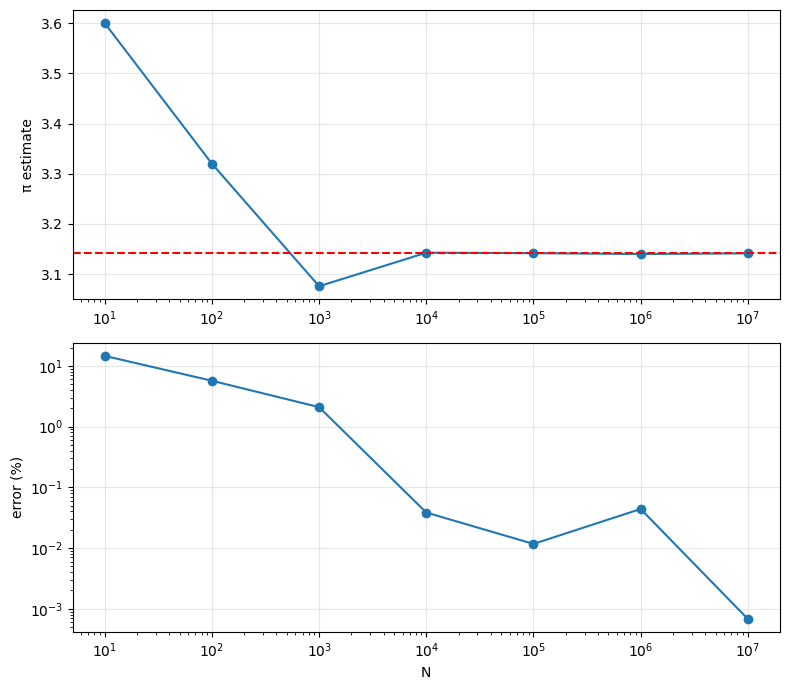

In [2]:
N, est, err = piwithN()
fig, ax = plt.subplots(2, 1, figsize=(8, 7))
ax[0].semilogx(N, est, 'o-')
ax[0].axhline(np.pi, color='r', ls='--')
ax[0].set_ylabel('π estimate')
ax[0].grid(True, alpha=0.3)
ax[1].loglog(N, err, 'o-')
ax[1].set_xlabel('N')
ax[1].set_ylabel('error (%)')
ax[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pi_convergence.png', dpi=150)
plt.show()

In [3]:
print(f'e method1: {emethod1(100000):.5f}')
print(f'e method2: {emethod2(10000):.5f}')
print(f'true e: {np.e:.5f}\n')
mc1 = MonteCarlo(circle, -1, 1, -1, 1, np.pi)
mc2 = MonteCarlo(parabola, 0, 1, 0, 1, 1/3)
print(f'circle: {mc1.estimate(1000000):.5f} (π={np.pi:.5f})')
print(f'parabola: {mc2.estimate(1000000):.5f} (1/3={1/3:.5f})')


e method1: 2.72591
e method2: 2.72470
true e: 2.71828

circle: 3.14102 (π=3.14159)
parabola: 0.33353 (1/3=0.33333)


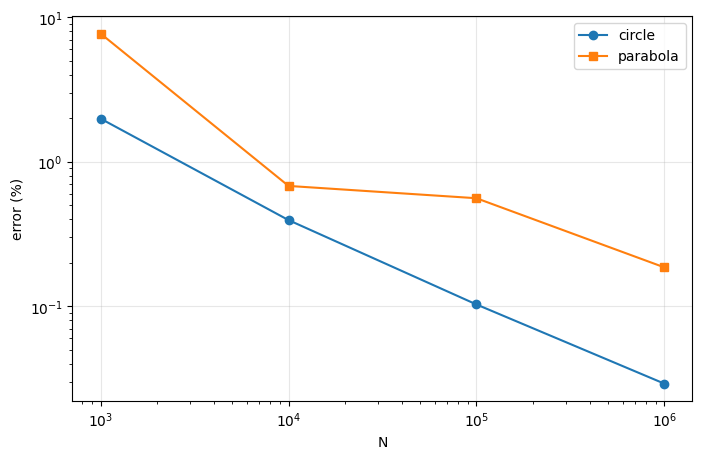

In [4]:
N = [1000, 10000, 100000, 1000000]
_, err1 = mc1.convergence(N)
_, err2 = mc2.convergence(N)

plt.figure(figsize=(8, 5))
plt.loglog(N, err1, 'o-', label='circle')
plt.loglog(N, err2, 's-', label='parabola')
plt.xlabel('N')
plt.ylabel('error (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('shapes_convergence.png', dpi=150)
plt.show()

Vectorization made the code faster because:
- NumPy operations use compiled C code instead of Python loops
- CPU can process multiple array elements at once (SIMD)
- Better memory access patterns reduce cache misses